Task-1:- To find histogram value and display histogram of a grayscale and color image

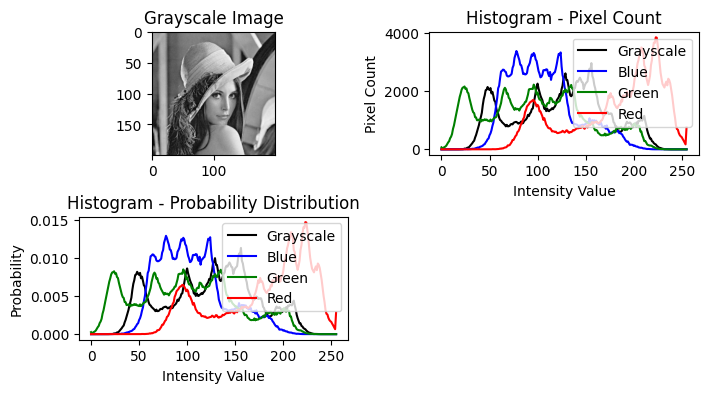

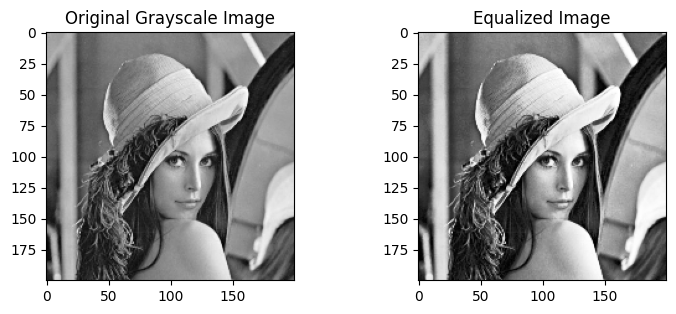

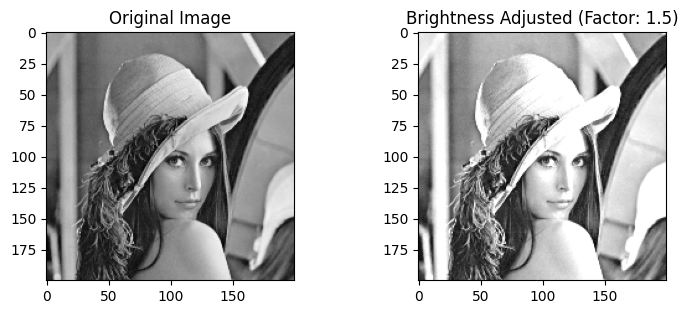

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_histogram(image_path):
    image = cv2.imread("/content/Lab-1 B-31 33 35 36 38.pdf-image-001.jpg")
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    hist_gray = cv2.calcHist([grayscale], [0], None, [256], [0, 256])
    hist_b = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
    hist_r = cv2.calcHist([image], [2], None, [256], [0, 256])

    hist_gray_prob = hist_gray / hist_gray.sum()
    hist_b_prob = hist_b / hist_b.sum()
    hist_g_prob = hist_g / hist_g.sum()
    hist_r_prob = hist_r / hist_r.sum()

    plt.figure(figsize=(8, 4))
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.resize(grayscale, (200, 200)), cmap='gray')
    plt.title("Grayscale Image")

    plt.subplot(2, 2, 2)
    plt.plot(hist_gray, color='black', label='Grayscale')
    plt.plot(hist_b, color='blue', label='Blue')
    plt.plot(hist_g, color='green', label='Green')
    plt.plot(hist_r, color='red', label='Red')
    plt.title("Histogram - Pixel Count")
    plt.xlabel("Intensity Value")
    plt.ylabel("Pixel Count")
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(hist_gray_prob, color='black', label='Grayscale')
    plt.plot(hist_b_prob, color='blue', label='Blue')
    plt.plot(hist_g_prob, color='green', label='Green')
    plt.plot(hist_r_prob, color='red', label='Red')
    plt.title("Histogram - Probability Distribution")
    plt.xlabel("Intensity Value")
    plt.ylabel("Probability")
    plt.legend()

    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.show()

def histogram_equalization(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    equalized_image = cv2.equalizeHist(image)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.resize(image, (200, 200)), cmap='gray')
    plt.title("Original Grayscale Image")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.resize(equalized_image, (200, 200)), cmap='gray')
    plt.title("Equalized Image")

    plt.subplots_adjust(wspace=0.5)
    plt.show()

def adjust_brightness(image_path, factor):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    adjusted = cv2.convertScaleAbs(image, alpha=factor, beta=0)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.resize(image, (200, 200)), cmap='gray')
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.resize(adjusted, (200, 200)), cmap='gray')
    plt.title(f"Brightness Adjusted (Factor: {factor})")

    plt.subplots_adjust(wspace=0.5)
    plt.show()

image_path = "/content/Lab-1 B-31 33 35 36 38.pdf-image-001.jpg"
compute_histogram(image_path)
histogram_equalization(image_path)
adjust_brightness(image_path, 1.5)

Task-2:- To perform Discrete Fourier transform (FFT) and Inverse Fourier transform (IFFT) to an
image. Take a grayscale image ( colored image is optional).

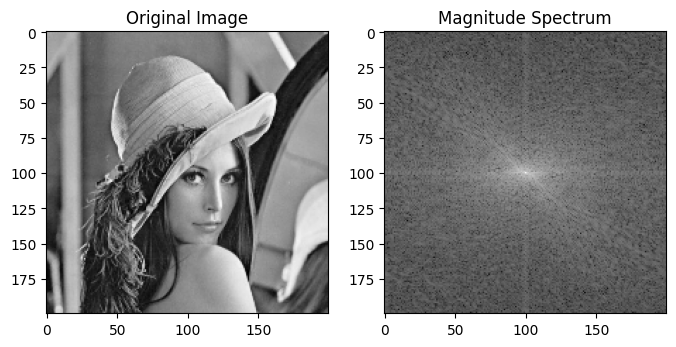

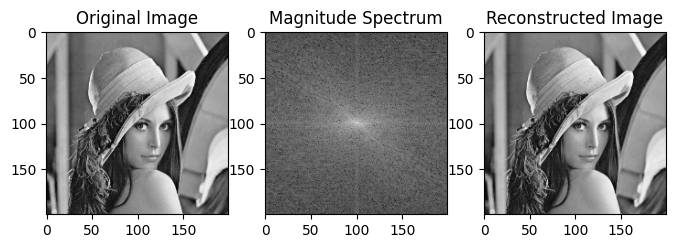

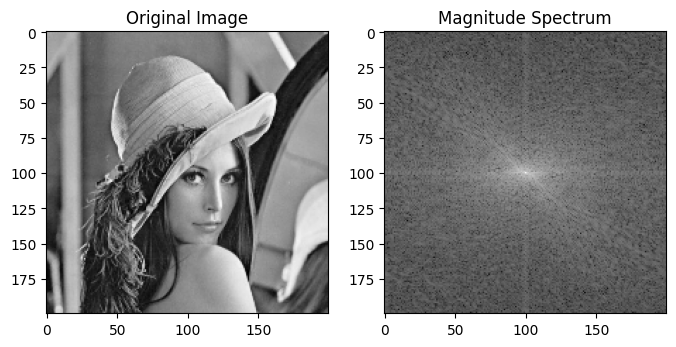

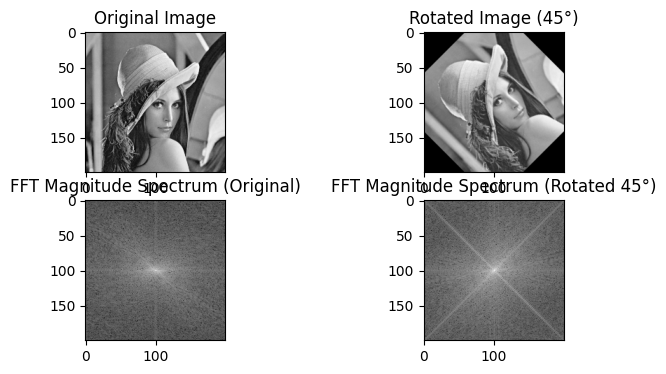

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_fft(image_path):
    """Computes the FFT of an image and displays its magnitude spectrum."""
    image = cv2.imread("/content/Lab-1 B-31 33 35 36 38.pdf-image-001.jpg", cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Image not found or unable to read.")
        return

    image = cv2.resize(image, (200, 200))
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title("Magnitude Spectrum")
    plt.show()

    return dft_shift, image

def inverse_fft(dft_shift, original_image):
    """Computes the inverse FFT to reconstruct the original image."""
    dft_ishift = np.fft.ifftshift(dft_shift)
    img_reconstructed = np.fft.ifft2(dft_ishift)
    img_reconstructed = np.abs(img_reconstructed)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Original Image")

    plt.subplot(1, 3, 2)
    plt.imshow(20 * np.log(np.abs(dft_shift) + 1), cmap='gray')
    plt.title("Magnitude Spectrum")

    plt.subplot(1, 3, 3)
    plt.imshow(img_reconstructed, cmap='gray')
    plt.title("Reconstructed Image")
    plt.show()

def verify_rotation_property(image_path, angle=45):
    """Verifies the Rotation Property of Fourier Transform."""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Image not found or unable to read.")
        return

    image = cv2.resize(image, (200, 200))
    (h, w) = image.shape
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

    dft_original, _ = compute_fft(image_path)
    dft_rotated = np.fft.fft2(rotated_image)
    dft_rotated_shift = np.fft.fftshift(dft_rotated)

    plt.figure(figsize=(8, 4))

    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")

    plt.subplot(2, 2, 2)
    plt.imshow(rotated_image, cmap='gray')
    plt.title(f"Rotated Image ({angle}°)")

    plt.subplot(2, 2, 3)
    plt.imshow(20 * np.log(np.abs(dft_original) + 1), cmap='gray')
    plt.title("FFT Magnitude Spectrum (Original)")

    plt.subplot(2, 2, 4)
    plt.imshow(20 * np.log(np.abs(dft_rotated_shift) + 1), cmap='gray')
    plt.title(f"FFT Magnitude Spectrum (Rotated {angle}°)")

    plt.show()

image_path = "/content/Lab-1 B-31 33 35 36 38.pdf-image-001.jpg"
dft_shift, original_image = compute_fft(image_path)
inverse_fft(dft_shift, original_image)
verify_rotation_property(image_path, angle=45)
